# Goal Programming with Python 
Steps: 
1. Determine whether constraint is soft or hard
2. add negative and positive deviational variable on each constraint
3. add deviational variable to objective function to be penalized 
4. each hard constraint can be written as LP constraint
4. add bound to constraint 

## notation
$$
    min z  = h(n,p) \\
    s.t. f_i(x) + n_i + p_i  = b_i \\ 
    x \in F \\
    n_i, p_i \geq 0, i = 1,2,...,m \\
$$

    

In [1]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [2]:
# Create an object to perform optimization
opt = SolverFactory('glpk')

# Create an object of a concrete model
model = ConcreteModel()

## goal programming lp model

$$
min z = 60x_1 + 40x_2 \\
s.t. 4x_1 4x_2 \geq 10 \\ 
2x_1 + x_2 \geq 4 \\
6x_1 + 2x_2 \leq 12 \\
$$

In [3]:
# Define the decision variables
model.x1 = Var(within = NonNegativeIntegers)
model.x2 = Var(within = NonNegativeIntegers)

# Define the deviational variables
model.n1 = Var(within = NonNegativeIntegers)
model.p1 = Var(within = NonNegativeIntegers)
model.n2 = Var(within = NonNegativeIntegers)
model.p2 = Var(within = NonNegativeIntegers)
model.n3 = Var(within = NonNegativeIntegers)
model.p3 = Var(within = NonNegativeIntegers)
model.n4 = Var(within = NonNegativeIntegers)
model.p4 = Var(within = NonNegativeIntegers)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the decision variables
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)

# Define the objective function
model.obj = Objective(expr = 60 * model.x1 +
    40 * model.x2)

# Define the constraints
model.con1 = Constraint(expr = 4 * model.x1 +
    4 * model.x2 >= 10)
model.con2 = Constraint(expr = 2 * model.x1 +
    model.x2 >= 4)
model.con3 = Constraint(expr = 6 * model.x1 +
    2 * model.x2 <= 12)

# Solve the linear programming problem
results = opt.solve(model)

# Print the results
print ("Status: ",
    results.solver.termination_condition)

print("x1 = ", model.x1.value)
print("x2 = ", model.x2.value)

print ("The optimal value of the objective function "
    "is = ", model.obj())

    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
Status:  optimal
x1 =  1.5
x2 =  1.0
The optimal value of the objective function is =  130.0


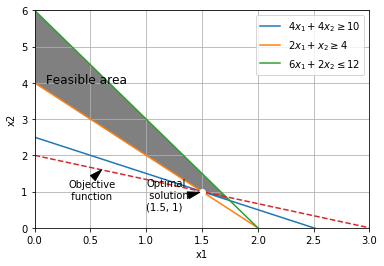

In [5]:
# Plot the results
x = np.arange(0, 5)

plt.plot(x, 2.5 - x, label = '$4x_1 + 4x_2 \geq 10$')
plt.plot(x, 4 - 2 * x, label= '$2x_1 + x_2 \geq 4$')
plt.plot(x, 6 - 3 * x, label = '$6x_1 + 2x_2 \leq 12$')
plt.plot(x, 2 - 2/3*x, '--')
plt.annotate('Objective\n function', xy = (0.6, 1.6),
    xytext = (0.3, 0.8), arrowprops =
    dict(facecolor = 'black', width = 1.5, headwidth = 7))
plt.annotate('Optimal\n solution\n(1.5, 1)', 
    xy = (1.48, 0.98), xytext = (1, 0.5), arrowprops =
    dict(facecolor = 'black', width = 1.5, headwidth = 7))
plt.plot(1.5, 1, 'wo')
plt.text(0.1, 4, 'Feasible area', size = '12')


# Define the boundaries of the feasible area in the plot
a = [0, 1.5, 1.75, 0, 0]
b = [4, 1, 0.75, 6, 4]
plt.fill(a, b, 'grey')
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis([0, 3, 0, 6])
plt.grid(True)
plt.legend()
plt.show()

## weighted goal programming

![](img/contoh_soal_weighted.png)

In [6]:
model.obj = Objective(expr = (1 / 600) * model.p1 +
    (1 / 700) * model.p2 + (2 / 18000) * model.n3 +
    (3 / 380) * model.p4)

# Define the constraints
model.con1 = Constraint(expr = 2 * model.x1 +
    4 * model.x2 + model.n1 - model.p1 == 600)
model.con2 = Constraint(expr = 5 * model.x1 +
    3 * model.x2 + model.n2 - model.p2 == 700)
model.con3 = Constraint(expr = 100 * model.x1 +
    90 * model.x2 + model.n3 - model.p3 == 18000)
model.con4 = Constraint(expr = 2 * model.x1 +
    2 * model.x2 + model.n4 - model.p4 == 380)
model.con5 = Constraint(expr = model.x1 +
    model.x2 <= 200)
model.con6 = Constraint(expr = model.x1 >= 60)
model.con7 = Constraint(expr = model.x2 >= 60)

# Solve the Goal Programming problem
opt.solve(model)

# Print the values of the decision variables
print("x1 = ", model.x1.value)
print("x2 = ", model.x2.value)

# Print the achieved values for each goal
if model.n1.value > 0:
    print("The first goal is underachieved by ",
          model.n1.value)
elif model.p1.value > 0:
    print("The first goal is overachieved by ",
          model.p1.value)
else:
    print("The first goal is fully satisfied")

if model.n2.value > 0:
    print("The second goal is underachieved by ",
          model.n2.value)
elif model.p2.value > 0:
    print("The second goal is overachieved by ",
          model.p2.value)
else:
    print("The second goal is fully satisfied")

if model.n3.value > 0:
    print("The third goal is underachieved by ",
          model.n3.value)
elif model.p3.value > 0:
    print("The third goal is overachieved by ",
          model.p3.value)
else:
    print("The third goal is fully satisfied")

if model.n4.value > 0:
    print("The fourth goal is underachieved by ",
          model.n4.value)
elif model.p4.value > 0:
    print("The fourth goal is overachieved by ",
          model.p4.value)
else:
    print("The fourth goal is fully satisfied")

    'pyomo.core.base.objective.SimpleObjective'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.objective.SimpleObjective'>). This
    is usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.SimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.SimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.c

## lexicographical goal programming
![](img/contoh_soal_lexi.png)

In [7]:
# Define the decision variables
model.x1 = Var(within = NonNegativeIntegers)
model.x2 = Var(within = NonNegativeIntegers)

# Define the deviational variables
model.n1 = Var(within = NonNegativeIntegers)
model.p1 = Var(within = NonNegativeIntegers)
model.n2 = Var(within = NonNegativeIntegers)
model.p2 = Var(within = NonNegativeIntegers)
model.n3 = Var(within = NonNegativeIntegers)
model.p3 = Var(within = NonNegativeIntegers)
model.n4 = Var(within = NonNegativeIntegers)
model.p4 = Var(within = NonNegativeIntegers)

    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del

In [8]:
# first priority level
model.obj = Objective(expr = model.p4)

# Define the constraints
model.con1 = Constraint(expr = 2 * model.x1 +
    4 * model.x2 + model.n1 - model.p1 == 600)
model.con2 = Constraint(expr = 5 * model.x1 +
    3 * model.x2 + model.n2 - model.p2 == 700)
model.con3 = Constraint(expr = 100 * model.x1 +
    90 * model.x2 + model.n3 - model.p3 == 18000)
model.con4 = Constraint(expr = 2 * model.x1 +
    2 * model.x2 + model.n4 - model.p4 == 380)
model.con5 = Constraint(expr = model.x1 +
    model.x2 <= 200)
model.con6 = Constraint(expr = model.x1 >= 60)
model.con7 = Constraint(expr = model.x2 >= 60)

# Solve the Goal Programming problem of the
# first priority level
opt.solve(model)

# Retrieve the value of the first priority level
p4 = model.p4.value

# Define the objective function of the
# second priority level
model.obj = Objective(expr = model.n3)

# Add a constraint for the value of the first
# priority level
model.con8 = Constraint(expr = model.p4 == p4)

# Solve the Goal Programming problem of the
# second priority level
opt.solve(model)

# Retrieve the value of the second priority level
n3 = model.n3.value

# Define the objective function of the
# third priority level
model.obj = Objective(expr = model.p1 + model.p2)

# Add a constraint for the value of the second
# priority level
model.con9 = Constraint(expr = model.n3 == n3)

# Solve the Goal Programming problem of the
# third priority level
opt.solve(model)

# Print the values of the decision variables
print("x1 = ", model.x1.value)
print("x2 = ", model.x2.value)

# Print the achieved values for each goal
if model.n1.value > 0:
    print("The first goal is underachieved by ",
          model.n1.value)
elif model.p1.value > 0:
    print("The first goal is overachieved by ",
          model.p1.value)
else:
    print("The first goal is fully satisfied")

if model.n2.value > 0:
    print("The second goal is underachieved by ",
          model.n2.value)
elif model.p2.value > 0:
    print("The second goal is overachieved by ",
          model.p2.value)
else:
    print("The second goal is fully satisfied")

if model.n3.value > 0:
    print("The third goal is underachieved by ",
          model.n3.value)
elif model.p3.value > 0:
    print("The third goal is overachieved by ",
          model.p3.value)
else:
    print("The third goal is fully satisfied")

if model.n4.value > 0:
    print("The fourth goal is underachieved by ",
          model.n4.value)
elif model.p4.value > 0:
    print("The fourth goal is overachieved by ",
          model.p4.value)
else:
    print("The fourth goal is fully satisfied")

    'pyomo.core.base.objective.SimpleObjective'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.objective.SimpleObjective'>). This
    is usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.SimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.SimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.c

## chebyshev goal programming.

![](img/contoh_soal_cheb.png)

In [9]:
# Define the decision variables
model.x1 = Var(within = NonNegativeIntegers)
model.x2 = Var(within = NonNegativeIntegers)

# Define the deviational variables
model.n1 = Var(within = NonNegativeIntegers)
model.p1 = Var(within = NonNegativeIntegers)
model.n2 = Var(within = NonNegativeIntegers)
model.p2 = Var(within = NonNegativeIntegers)
model.n3 = Var(within = NonNegativeIntegers)
model.p3 = Var(within = NonNegativeIntegers)
model.n4 = Var(within = NonNegativeIntegers)
model.p4 = Var(within = NonNegativeIntegers)

# Define the variable of maximal deviation
# from amongst the set of goals
model.l = Var(within=NonNegativeReals)

# Define the objective function
model.obj = Objective(expr = model.l)

# Define the constraints
model.con1 = Constraint(expr = (1 / 600) *
    model.p1 <= model.l)
model.con2 = Constraint(expr = (1 / 700) *
    model.p2 <= model.l)
model.con3 = Constraint(expr = (2 / 18000) *
    model.n3 <= model.l)
model.con4 = Constraint(expr = (3 / 380) *
    model.p4 <= model.l)
model.con5 = Constraint(expr = 2 * model.x1 +
    4 * model.x2 + model.n1 - model.p1 == 600)
model.con6 = Constraint(expr = 5 * model.x1 +
    3 * model.x2 + model.n2 - model.p2 == 700)
model.con7 = Constraint(expr = 100 * model.x1 +
    90 * model.x2 + model.n3 - model.p3 == 18000)
model.con8 = Constraint(expr = 2 * model.x1 +
    2 * model.x2 + model.n4 - model.p4 == 380)
model.con9 = Constraint(expr = model.x1 +
    model.x2 <= 200)
model.con10 = Constraint(expr = model.x1 >= 60)
model.con11 = Constraint(expr = model.x2 >= 60)

# Solve the Goal Programming problem
opt.solve(model)

# Print the values of the decision variables
print("x1 = ", model.x1.value)
print("x2 = ", model.x2.value)

# Print the achieved values for each goal
if model.n1.value > 0:
    print("The first goal is underachieved by ",
          model.n1.value)
elif model.p1.value > 0:
    print("The first goal is overachieved by ",
          model.p1.value)
else:
    print("The first goal is fully satisfied")

if model.n2.value > 0:
    print("The second goal is underachieved by ",
          model.n2.value)
elif model.p2.value > 0:
    print("The second goal is overachieved by ",
          model.p2.value)
else:
    print("The second goal is fully satisfied")

if model.n3.value > 0:
    print("The third goal is underachieved by ",
          model.n3.value)
elif model.p3.value > 0:
    print("The third goal is overachieved by ",
          model.p3.value)
else:
    print("The third goal is fully satisfied")

if model.n4.value > 0:
    print("The fourth goal is underachieved by ",
          model.n4.value)
elif model.p4.value > 0:
    print("The fourth goal is overachieved by ",
          model.p4.value)
else:
    print("The fourth goal is fully satisfied")

    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.var.SimpleVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.SimpleVar'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del